In [71]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# Algorithms

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [72]:
#Read in the data 
df = pd.read_csv("ml_clean_homicide_data.csv", encoding = 'latin1')
df

,uid,disposition,victim_sex,victim_race,victim_age,age_range,reported_date,reported_year,reported_month,reported_weekday,season,city,state,lat,lon,LOCATION,POPULATION
0,Alb-000001,No Arrest,Male,Hispanic,78,65+,2010-05-04,2010,May,Tuesday,Spring,Albuquerque,NM,35.095788,-106.538555,"Albuquerque, NM",545852
1,Alb-000002,Arrest Made,Male,Hispanic,17,0-17,2010-02-16,2010,February,Tuesday,Winter,Albuquerque,NM,35.056810,-106.715321,"Albuquerque, NM",545852
2,Alb-000003,No Arrest,Female,White,15,0-17,2010-06-01,2010,June,Tuesday,Summer,Albuquerque,NM,35.086092,-106.695568,"Albuquerque, NM",545852
3,Alb-000004,Arrest Made,Male,Hispanic,32,30-44,2010-01-01,2010,January,Friday,Winter,Albuquerque,NM,35.078493,-106.556094,"Albuquerque, NM",545852
4,Alb-000005,No Arrest,Female,White,72,65+,2010-01-02,2010,January,Saturday,Winter,Albuquerque,NM,35.130357,-106.580986,"Albuquerque, NM",545852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,Was-001380,Arrest Made,Male,Black,29,18-29,2016-09-08,2016,September,Thursday,Fall,Washington,DC,38.828704,-77.002075,"Washington, DC",687576
47474,Was-001381,No Arrest,Male,Black,19,18-29,2016-09-13,2016,September,Tuesday,Fall,Washington,DC,38.822852,-77.001725,"Washington, DC",687576
47475,Was-001382,No Arrest,Male,Black,23,18-29,2016-11-14,2016,November,Monday,Fall,Washington,DC,38.828025,-77.002511,"Washington, DC",687576
47476,Was-001383,No Arrest,Male,Black,24,18-29,2016-11-30,2016,November,Wednesday,Fall,Washington,DC,38.820476,-77.008640,"Washington, DC",687576


In [73]:
#checking the columns in the Df
df.columns

Index(['uid', 'disposition', 'victim_sex', 'victim_race', 'victim_age',
       'age_range', 'reported_date', 'reported_year', 'reported_month',
       'reported_weekday', 'season', 'city', 'state', 'lat', 'lon', 'LOCATION',
       'POPULATION'],
      dtype='object')

In [74]:
selected_cols = ['victim_age', 'victim_race', 'victim_sex', 'reported_weekday', 'reported_month', 'reported_year', 'season', 'city',
                 'state', 'POPULATION', 'disposition']
df1 = pd.DataFrame(df[selected_cols])
df1

,victim_age,victim_race,victim_sex,reported_weekday,reported_month,reported_year,season,city,state,POPULATION,disposition
0,78,Hispanic,Male,Tuesday,May,2010,Spring,Albuquerque,NM,545852,No Arrest
1,17,Hispanic,Male,Tuesday,February,2010,Winter,Albuquerque,NM,545852,Arrest Made
2,15,White,Female,Tuesday,June,2010,Summer,Albuquerque,NM,545852,No Arrest
3,32,Hispanic,Male,Friday,January,2010,Winter,Albuquerque,NM,545852,Arrest Made
4,72,White,Female,Saturday,January,2010,Winter,Albuquerque,NM,545852,No Arrest
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Black,Male,Thursday,September,2016,Fall,Washington,DC,687576,Arrest Made
47474,19,Black,Male,Tuesday,September,2016,Fall,Washington,DC,687576,No Arrest
47475,23,Black,Male,Monday,November,2016,Fall,Washington,DC,687576,No Arrest
47476,24,Black,Male,Wednesday,November,2016,Fall,Washington,DC,687576,No Arrest


In [75]:
#Arrest = 1 , No arrest = 2
df1["disposition"] = df1["disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)
df1

,victim_age,victim_race,victim_sex,reported_weekday,reported_month,reported_year,season,city,state,POPULATION,disposition
0,78,Hispanic,Male,Tuesday,May,2010,Spring,Albuquerque,NM,545852,0
1,17,Hispanic,Male,Tuesday,February,2010,Winter,Albuquerque,NM,545852,1
2,15,White,Female,Tuesday,June,2010,Summer,Albuquerque,NM,545852,0
3,32,Hispanic,Male,Friday,January,2010,Winter,Albuquerque,NM,545852,1
4,72,White,Female,Saturday,January,2010,Winter,Albuquerque,NM,545852,0
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Black,Male,Thursday,September,2016,Fall,Washington,DC,687576,1
47474,19,Black,Male,Tuesday,September,2016,Fall,Washington,DC,687576,0
47475,23,Black,Male,Monday,November,2016,Fall,Washington,DC,687576,0
47476,24,Black,Male,Wednesday,November,2016,Fall,Washington,DC,687576,0


In [76]:
#value counts for disposition
df1.disposition.value_counts()

0    24258
1    23220
Name: disposition, dtype: int64

In [77]:
#Counting the unique values and values counts for each of the categorical columns in the DF
cat_cols = df1.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(df1[col].nunique())
    print(df1[col].value_counts())
    print()

5
Black       33062
Hispanic     6817
White        6259
Asian         676
Other         664
Name: victim_race, dtype: int64

2
Male      40387
Female     7091
Name: victim_sex, dtype: int64

7
Sunday       7850
Saturday     7619
Monday       6853
Friday       6446
Tuesday      6331
Wednesday    6256
Thursday     6123
Name: reported_weekday, dtype: int64

12
July         4624
August       4360
June         4273
May          4210
September    4131
October      4060
December     3890
November     3886
April        3779
January      3682
March        3622
February     2961
Name: reported_month, dtype: int64

4
Summer    13257
Fall      12077
Spring    11611
Winter    10533
Name: season, dtype: int64

47
Chicago           5523
Philadelphia      3036
Houston           2908
Baltimore         2827
Detroit           2496
Los Angeles       2196
St. Louis         1661
Memphis           1510
New Orleans       1394
Indianapolis      1321
Washington        1308
Las Vegas         1299
Jacksonville   

In [78]:
#One hot coding
df2 = pd.get_dummies(df1)
df2

,victim_age,reported_year,POPULATION,disposition,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_White,victim_sex_Female,...,state_NM,state_NV,state_NY,state_OH,state_OK,state_PA,state_TN,state_TX,state_VA,state_WI
0,78,2010,545852,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,17,2010,545852,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15,2010,545852,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,32,2010,545852,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,72,2010,545852,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,2016,687576,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47474,19,2016,687576,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47475,23,2016,687576,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47476,24,2016,687576,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47478 entries, 0 to 47477
Columns: 108 entries, victim_age to state_WI
dtypes: int64(4), uint8(104)
memory usage: 6.2 MB


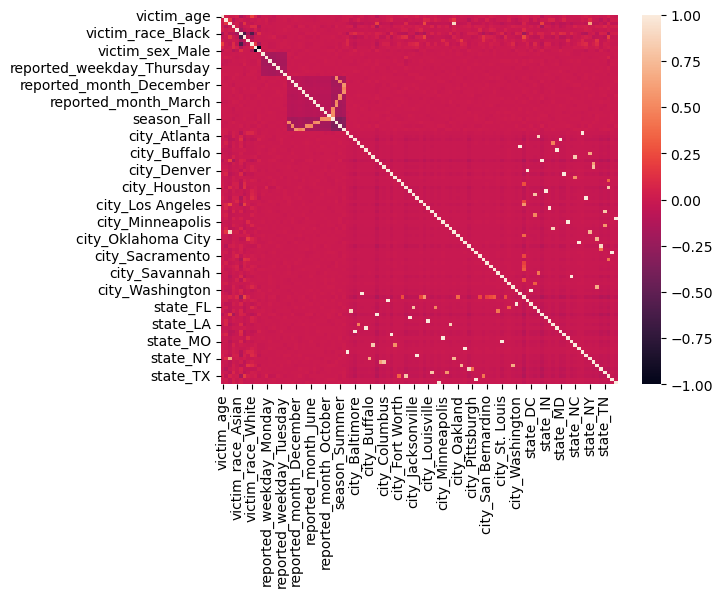

In [82]:
# plotting the heatmap and correlation
corrs = df2.corr()
sns.heatmap(corrs)
plt.show()

In [84]:

#checking the correlation between the variables and target (disposition)
abs(corrs["disposition"]).sort_values(ascending=False)

disposition                   1.000000
city_Chicago                  0.162975
state_IL                      0.162975
victim_race_White             0.106228
victim_sex_Female             0.102491
                                ...   
reported_weekday_Saturday     0.000664
reported_weekday_Wednesday    0.000546
state_MN                      0.000473
city_Minneapolis              0.000473
city_Jacksonville             0.000296
Name: disposition, Length: 108, dtype: float64

In [29]:
# Create our train/test set
X = df2.drop(columns=["disposition"])
y = df2["disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y, test_size = 0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37982, 107) (37982,)
(9496, 107) (9496,)


In [30]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[13083  6323]
 [ 7177 11399]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     19406
           1       0.64      0.61      0.63     18576

    accuracy                           0.64     37982
   macro avg       0.64      0.64      0.64     37982
weighted avg       0.64      0.64      0.64     37982


TESTING SET METRICS
[[3099 1753]
 [1986 2658]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      4852
           1       0.60      0.57      0.59      4644

    accuracy                           0.61      9496
   macro avg       0.61      0.61      0.61      9496
weighted avg       0.61      0.61      0.61      9496



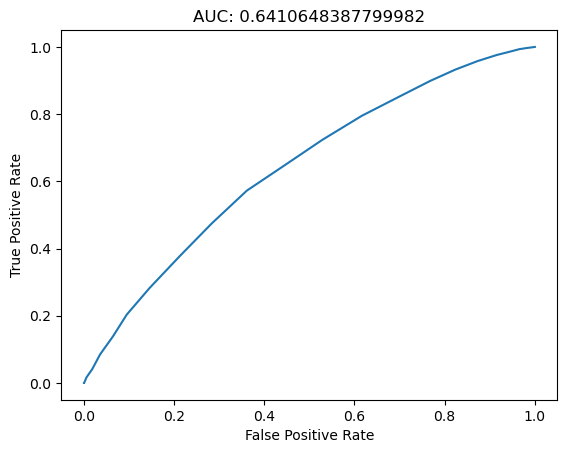

In [31]:
# init the model
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[19401     5]
 [  258 18318]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19406
           1       1.00      0.99      0.99     18576

    accuracy                           0.99     37982
   macro avg       0.99      0.99      0.99     37982
weighted avg       0.99      0.99      0.99     37982


TESTING SET METRICS
[[2768 2084]
 [2106 2538]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      4852
           1       0.55      0.55      0.55      4644

    accuracy                           0.56      9496
   macro avg       0.56      0.56      0.56      9496
weighted avg       0.56      0.56      0.56      9496



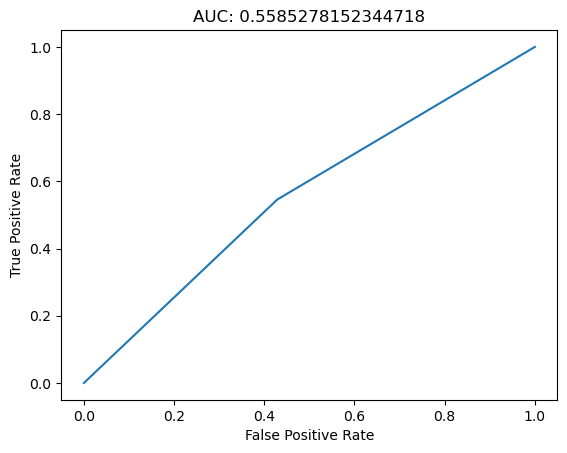

In [32]:
# init the model
dt = DecisionTreeClassifier(random_state=42)
doMLClassification(dt, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[19300   106]
 [  157 18419]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19406
           1       0.99      0.99      0.99     18576

    accuracy                           0.99     37982
   macro avg       0.99      0.99      0.99     37982
weighted avg       0.99      0.99      0.99     37982


TESTING SET METRICS
[[2876 1976]
 [1791 2853]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      4852
           1       0.59      0.61      0.60      4644

    accuracy                           0.60      9496
   macro avg       0.60      0.60      0.60      9496
weighted avg       0.60      0.60      0.60      9496



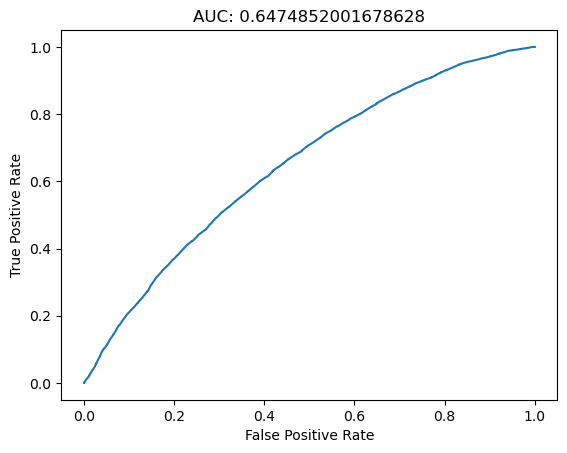

In [33]:
# init the model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[12422  6984]
 [ 7283 11293]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64     19406
           1       0.62      0.61      0.61     18576

    accuracy                           0.62     37982
   macro avg       0.62      0.62      0.62     37982
weighted avg       0.62      0.62      0.62     37982


TESTING SET METRICS
[[3107 1745]
 [1875 2769]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      4852
           1       0.61      0.60      0.60      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



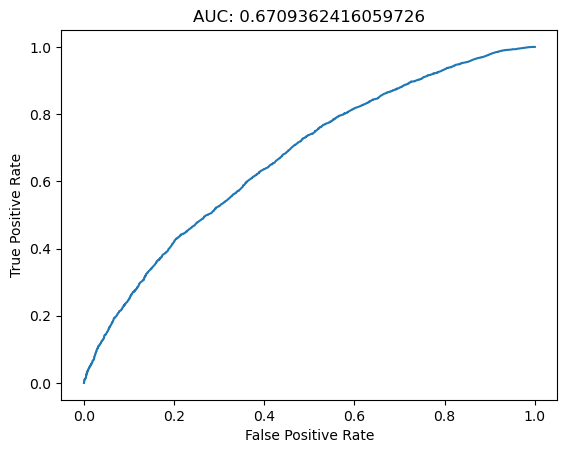

In [34]:
#init the model
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[19401     5]
 [  258 18318]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19406
           1       1.00      0.99      0.99     18576

    accuracy                           0.99     37982
   macro avg       0.99      0.99      0.99     37982
weighted avg       0.99      0.99      0.99     37982


TESTING SET METRICS
[[2842 2010]
 [1901 2743]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4852
           1       0.58      0.59      0.58      4644

    accuracy                           0.59      9496
   macro avg       0.59      0.59      0.59      9496
weighted avg       0.59      0.59      0.59      9496



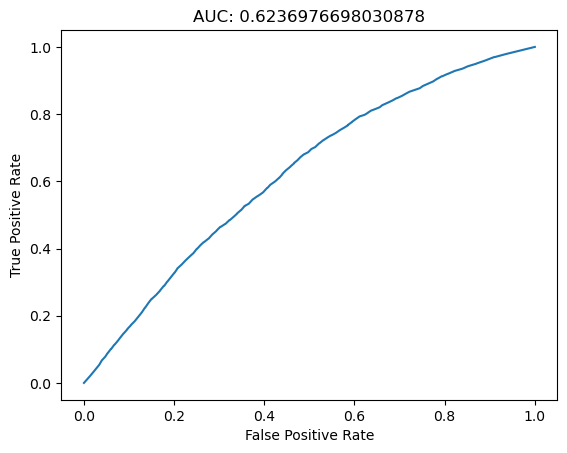

In [35]:
# init the model
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[12619  6787]
 [ 7069 11507]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     19406
           1       0.63      0.62      0.62     18576

    accuracy                           0.64     37982
   macro avg       0.63      0.63      0.63     37982
weighted avg       0.64      0.64      0.64     37982


TESTING SET METRICS
[[3110 1742]
 [1825 2819]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      4852
           1       0.62      0.61      0.61      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



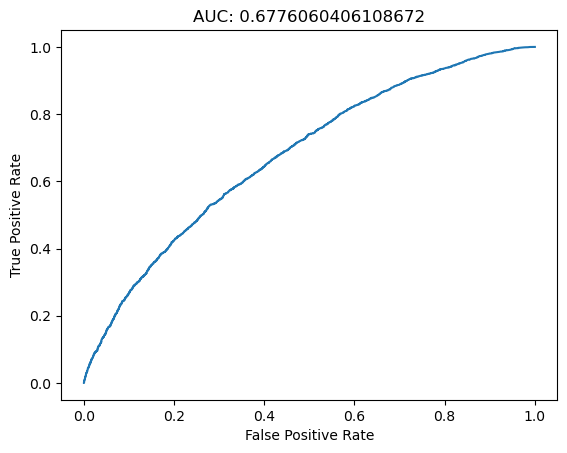

In [36]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[14182  5224]
 [ 5525 13051]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     19406
           1       0.71      0.70      0.71     18576

    accuracy                           0.72     37982
   macro avg       0.72      0.72      0.72     37982
weighted avg       0.72      0.72      0.72     37982


TESTING SET METRICS
[[3117 1735]
 [1832 2812]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      4852
           1       0.62      0.61      0.61      4644

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



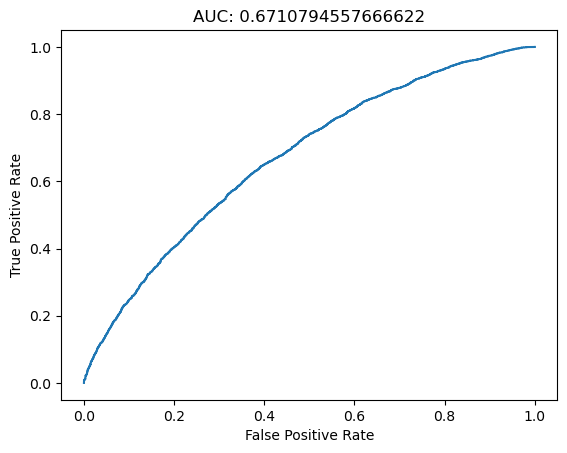

In [37]:
 # init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18576, number of negative: 19406
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 37982, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489074 -> initscore=-0.043712
[LightGBM] [Info] Start training from score -0.043712
TRAINING SET METRICS
[[12876  6530]
 [ 6231 12345]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     19406
           1       0.65      0.66      0.66     18576

    accuracy                           0.66     37982
   macro avg       0.66      0.66      0.66     37982
weighted avg       0.66      0.66      0.66     37982


TESTING SET METRICS
[[3048 1804]
 [1746 289

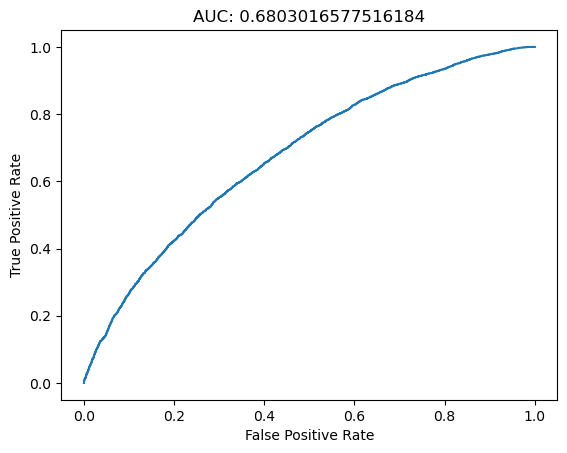

In [38]:
 # init the model
lgbm = LGBMClassifier(random_state=42)
doMLClassification(lgbm, X_train, y_train, X_test, y_test)

In [39]:
sorted(list(zip(lgbm.feature_importances_, X.columns)), reverse=True)

[(688, 'victim_age'),
 (371, 'POPULATION'),
 (364, 'reported_year'),
 (64, 'victim_race_White'),
 (61, 'victim_sex_Female'),
 (47, 'victim_race_Black'),
 (45, 'reported_weekday_Tuesday'),
 (45, 'reported_weekday_Monday'),
 (41, 'season_Winter'),
 (39, 'season_Spring'),
 (39, 'season_Fall'),
 (37, 'reported_weekday_Friday'),
 (36, 'reported_month_December'),
 (35, 'reported_weekday_Sunday'),
 (34, 'reported_weekday_Saturday'),
 (33, 'city_Baltimore'),
 (32, 'season_Summer'),
 (32, 'reported_weekday_Thursday'),
 (32, 'reported_month_January'),
 (32, 'city_New Orleans'),
 (30, 'city_Detroit'),
 (29, 'reported_weekday_Wednesday'),
 (28, 'city_Miami'),
 (28, 'city_Chicago'),
 (24, 'reported_month_February'),
 (23, 'reported_month_October'),
 (23, 'city_Milwaukee'),
 (22, 'victim_race_Hispanic'),
 (22, 'state_TN'),
 (21, 'state_CA'),
 (21, 'reported_month_November'),
 (21, 'reported_month_May'),
 (21, 'city_Omaha'),
 (20, 'city_Richmond'),
 (19, 'reported_month_July'),
 (19, 'city_Tulsa'),
 

In [40]:
import pickle

filename = 'model.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(lgbm, file)